In [85]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv("/kaggle/input/customer-data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
df.set_index('CustomerID', inplace=True)

In [89]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [90]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [91]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
df['Genre'] = df['Genre'].replace('Male', 1)
df['Genre'] = df['Genre'].replace('Female', 0)

In [93]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [94]:
df.dtypes

Genre                 int64
Age                   int64
Annual_Income_(k$)    int64
Spending_Score        int64
dtype: object

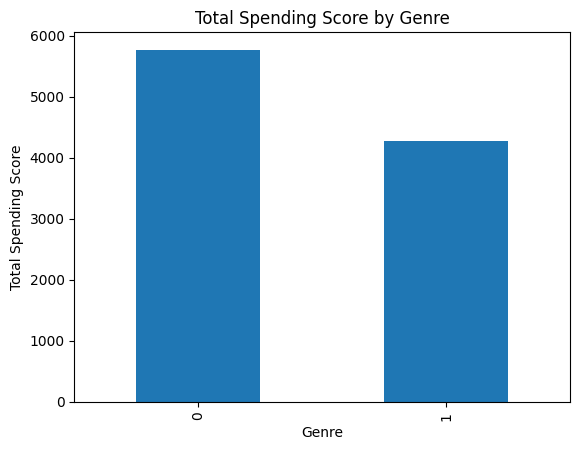

In [95]:
bar_plot = df.groupby('Genre')['Spending_Score'].sum().plot(kind='bar')
bar_plot.set_xlabel('Genre')
bar_plot.set_ylabel('Total Spending Score')
bar_plot.set_title('Total Spending Score by Genre')
plt.show()

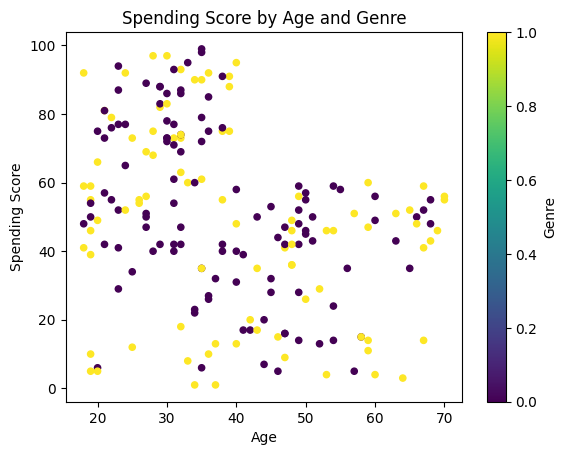

In [96]:
scatter_plot = df.plot.scatter(x='Age', y='Spending_Score', c='Genre', cmap='viridis')
scatter_plot.set_xlabel('Age')
scatter_plot.set_ylabel('Spending Score')
scatter_plot.set_title('Spending Score by Age and Genre')

plt.show()

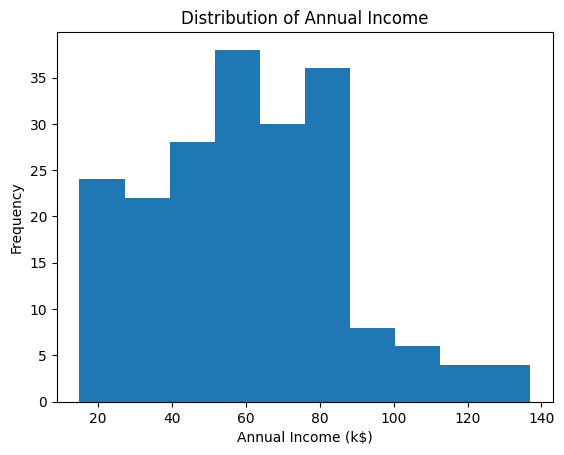

In [97]:
# Create a histogram
hist_plot = df['Annual_Income_(k$)'].plot.hist(bins=10)
hist_plot.set_xlabel('Annual Income (k$)')
hist_plot.set_ylabel('Frequency')
hist_plot.set_title('Distribution of Annual Income')

plt.show()

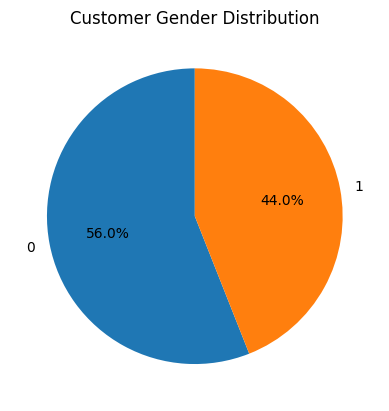

In [98]:
genre_counts = df.groupby('Genre').size()

# Create a pie chart
pie_chart = genre_counts.plot.pie(autopct='%1.1f%%', startangle=90)
pie_chart.set_title('Customer Gender Distribution')

plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [100]:
x = df.drop(columns = 'Spending_Score')
y = df['Spending_Score']

In [101]:
model = DecisionTreeClassifier()
# model.fit(x,y)
# predictions = model.predict([[1,20,16], [0, 55, 20]])
# predictions
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test,predictions)
score

0.025